## Thanks `ChatGPT` for the Following...

### Other references
* https://primes.utm.edu/curios/includes/primetest.php
* http://www.umopit.ru/CompLab/primes32eng.htm - that's where you can get the file `primes.32b` assumed below
* https://play.zokrat.es/

### Zokrates on Youtube

https://www.youtube.com/watch?v=_ZvGZxhCFfE&ab_channel=PaulBrody

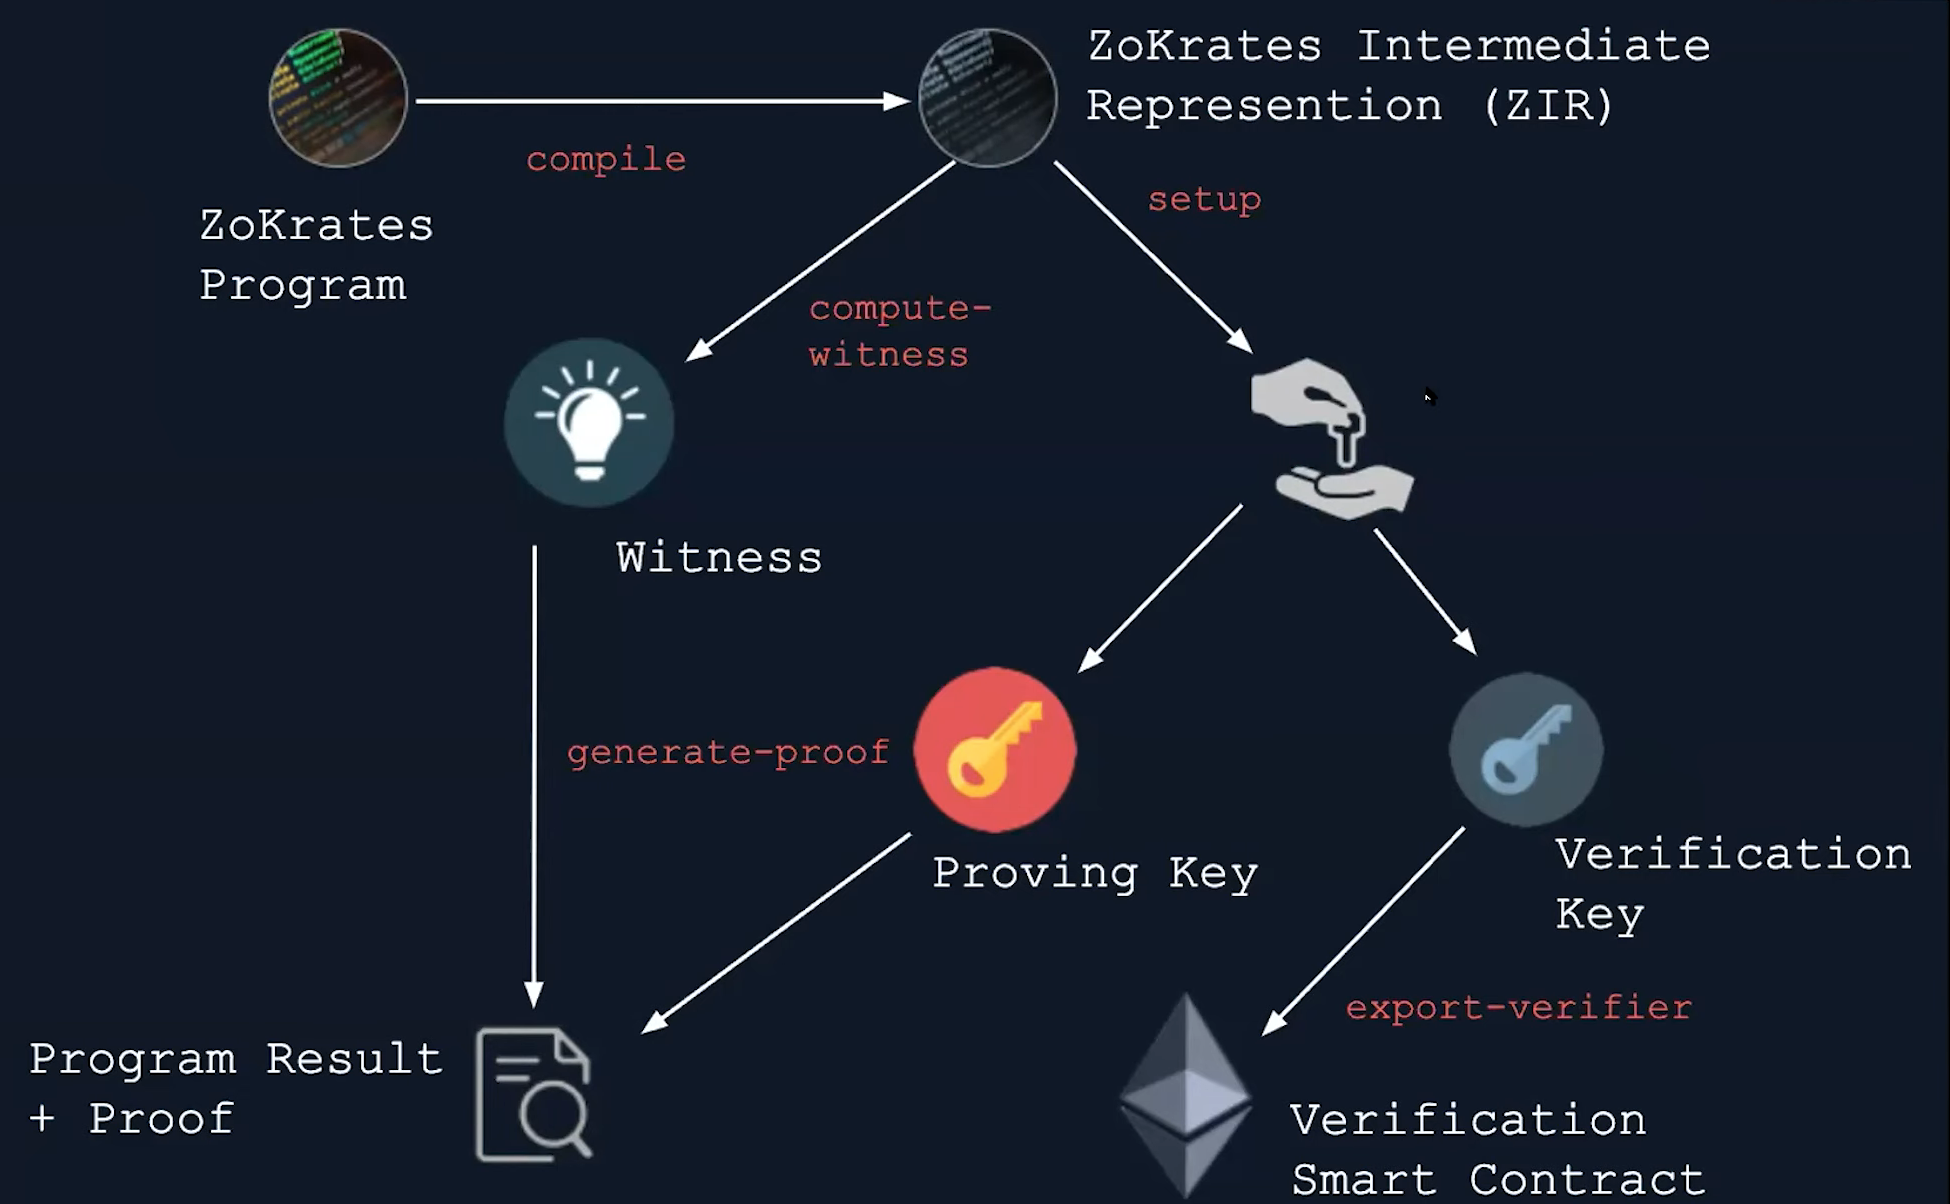

## **Secret Bounties**:  Buying a secret with a special property privately on chain

Suppose Alice wants to know something and is willing to pay for it when provided with the info. Eg, she publishes a large number $n$ she wishes to learn a factor of. She wants to ensure **fair payouts** to bounty hunters: they should be 100% confident of being payed for providing the secret. An Algorand Application or Logic Signature seems well suited for this purpose. But she doesn’t want others to learn the secret by replaying the app/logic sig transaction which is totally public. So she announces the following **Secret Bounty Program**:

1. Alice publishes the secret request (eg “find a factor of $n$”) and a way to contact her privately
2. A bounty hunter Eve contacts Alice claiming a solution (eg she knows a $p$ that factors $n$) 
3. Alice prepares the bounty algorithm and shares all details with Eve:
  * Alice privately sends Eve a _one time pad_ $r$ (or another reversible method for hiding the secret) which will be used to create the obscured input $z$
  * Alice also prepares a ZK-SNARK for “I know a $z$ that when unencrypted by secret $r$ produces Alice's requested secret” (eg $z$ unpadded by $r$ is a non-trivial factor of $n$).
  * Alice prepares an app or logic sig to verify the ZK-SNARK and payout to Eve’s address
4. Alice puts 1337 Algos reward is this app or logic sig
5. Eve sends a payment transaction from the app or logic sig with argument $z$ and gets paid

In [3]:
from sympy import isprime
import struct
import random

def get_random_prime(primes_file='primes.32b'):
    # Open the file in binary mode
    with open(primes_file, 'rb') as f:
        # Read the file size
        f.seek(0, 2)
        file_size = f.tell()

        # Go back to the beginning of the file
        f.seek(0)

        # Calculate the number of prime numbers in the file
        num_primes = file_size // 4

        # Generate a random index between 0 and num_primes - 1
        index = random.randint(0, num_primes - 1)

        # Seek to the position of the prime number at the selected index
        f.seek(index * 4)

        # Read the prime number at the selected index
        prime = struct.unpack('<I', f.read(4))[0]

        # Print the selected prime number
        print(prime)

        assert isprime(prime), "oh crap!!!"

        print("Yay!!! sympy says it was actually prime")

In [2]:
get_random_prime() # older version

764025083


In [4]:
get_random_prime() # newer version

2222792309
Yay!!! sympy says it was actually prime


In [12]:
p, q = 764025083, 2222792309

In [13]:
print(f"{p} * {q} = {p * q}")

764025083 * 2222792309 = 1698269078375486647


In [14]:
isprime(p*q)

False

## Get a random 64 bit number

In [8]:
import secrets

# Generate a random 64-bit integer
random_int = secrets.randbelow(2**64)

# Print the generated integer
print(random_int)

15825923428474158623


In [15]:
p_r, q_r = list(map(lambda x: (x + random_int) % 2**64, (p, q)))

p_r, q_r

(15825923429238183706, 15825923430696950932)